<a href="https://colab.research.google.com/github/Saxumatrum/Saxumatrum/blob/main/aam71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **COMP6685 Deep Learning Coursework A1**


Individual (25% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [1]:
#Importing of libraries
import numpy as np
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils
from keras import regularizers
from sklearn.model_selection import KFold

#import and split fashion mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# consider them as float and normalize
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255


#show the size of the train and test datasets
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')






print('Ready')



60000 train samples
10000 test samples
Ready


*your answer here*

Visualise a random sample image of the dataset. **(5 marks)**

---



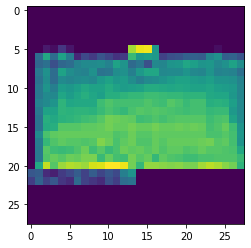

In [2]:
import random
number=np.random.randint(len(train_images))
image=train_images[number]
plt.imshow(image.reshape(28,28))
plt.show()

Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [8]:
#TRAINING PARAMETERS

BATCH_SIZE=128
N_EPOCHS=10
VALIDATION_SPLIT=0.2
VERBOSE=1
INPUTS=(28,28,1)
N_CLASSES=10

#DEFINING THE CNN

inputs=keras.Input(shape=INPUTS)

#first input layer with L1 regularisation and first pooling layer
first=layers.Conv2D(filters=32, kernel_size=5,activation='relu',kernel_regularizer=regularizers.l1(0.001),padding='same')(inputs)
first_pool=layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(first)


#flatten output from pooling into linear vector
flat=layers.Flatten()(first_pool)

#dense layer with 100 neurons and a drpout of 0.5
third=layers.Dense(100,activation='relu')(flat)
dropout=layers.Dropout(0.5)(third)

#output layer with 10 neurons and softmax activation
fourth=layers.Dense(N_CLASSES,activation='softmax')(dropout)



#declaring the model
model = keras.Model(inputs=inputs, outputs=fourth)


#compiling the model with parameters
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()







Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                           

Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [4]:
kfold = KFold(n_splits=5, shuffle=True) #declaring number of folds. Shuffle=True means datset is shuffled after every split
n=1
accuracy_list = []             #list to hold the 5 accuracy scores from the 5 folds
loss_list=[]                   #list to hold the 5 loss scores from the 5 folds
for train, test in kfold.split(train_images, train_labels):
  print(f"K-FOLD {n}")
  model.fit(train_images, train_labels, batch_size=BATCH_SIZE,epochs=N_EPOCHS, validation_split=VALIDATION_SPLIT,verbose=VERBOSE)  #fitting the model to the data
  loss, accuracy = model.evaluate(test_images, test_labels)  # evaluate loss and accuracy scores and append them to respective lists
  accuracy_list.append(accuracy)
  loss_list.append(loss)
  n=n+1

K-FOLD 1
Epoch 1/10
375/375 [==============================] - 50s 129ms/step - loss: 0.6416 - accuracy: 0.7914 - val_loss: 0.4133 - val_accuracy: 0.8645
Epoch 2/10
375/375 [==============================] - 38s 102ms/step - loss: 0.4415 - accuracy: 0.8617 - val_loss: 0.3608 - val_accuracy: 0.8842
Epoch 3/10
375/375 [==============================] - 38s 103ms/step - loss: 0.3908 - accuracy: 0.8773 - val_loss: 0.3315 - val_accuracy: 0.8916
Epoch 4/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3590 - accuracy: 0.8865 - val_loss: 0.3132 - val_accuracy: 0.8990
Epoch 5/10
375/375 [==============================] - 38s 101ms/step - loss: 0.3405 - accuracy: 0.8921 - val_loss: 0.3022 - val_accuracy: 0.9037
Epoch 6/10
375/375 [==============================] - 40s 106ms/step - loss: 0.3248 - accuracy: 0.8961 - val_loss: 0.2966 - val_accuracy: 0.9038
Epoch 7/10
375/375 [==============================] - 37s 100ms/step - loss: 0.3125 - accuracy: 0.8999 - val_loss: 0.2922

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [7]:
print('the accuracy scores for each k-fold are: ', accuracy_list)  #display accuracy score for each k-fold
print('the loss scores for each k-fold are: ',loss_list)           #display loss score for each k-fold
avg_accuracy= sum(accuracy_list)/len(accuracy_list)  #mean/avg accuracy
avg_loss= sum(loss_list)/len(loss_list)             #mean/avg loss

print(f"the average accuracy across all folds is: {avg_accuracy:.3f}")
print(f"the average loss across all folds is: {avg_loss:.3f}")

the accuracy scores for each k-fold are:  [0.9053999781608582, 0.9103999733924866, 0.9139000177383423, 0.9147999882698059, 0.9138000011444092]
the loss scores for each k-fold are:  [0.2879372239112854, 0.2857828736305237, 0.2952173948287964, 0.30669838190078735, 0.3525087833404541]
the average accuracy across all folds is: 0.912
the average loss across all folds is: 0.306


*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

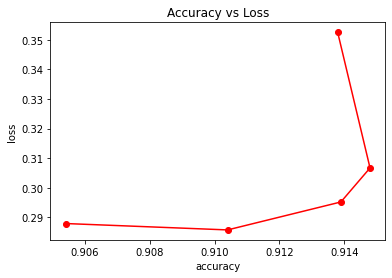

In [6]:
plt.plot(accuracy_list,loss_list,'r-')  #accuracy list as x and loss list as y (line)
plt.plot(accuracy_list,loss_list,'ro')  #accuracy list as x and loss list as y (points)
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.title('Accuracy vs Loss')

plt.show()

Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

Ans: Yes, initially I did not apply a regularisation technique and my accuracy hit a plateau when it got to 0.90. I then increased the number of neurons in the dense layer and applied an L1 regulariser. This increased my accuracy to 0.91, and reduced my loss to 0.32, from 0.41.

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

Ans: I think my model performed well. Having a convolutional layer meant I did not need to train it for as many epochs as a multi-layer perceptron. Regularisers are very much needed to prevent overfitting, as stated above. I experimented with different ones and found L1 regulariser gave me the best results. Having an incessantly large number of neurons increased my training time without increasing my accuracy. These are my conclusions.

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

